In [1]:
import pandas as pd
import numpy as np
import glob

In [2]:
glob.glob("*",recursive=True,include_hidden=True)

['._IDEAM_Temperatura.csv',
 'TEMP_ano_depto',
 '.ipynb_checkpoints',
 'IDEAM_Temperatura.csv',
 'RAIN_por_primeros15dias_ano_depto',
 '._IDEAM_Humedad_del_Aire_2_metros.csv',
 'Untitled.ipynb',
 'IDEAM_Precipitacion.csv',
 'HUMI_ano_depto',
 'Untitled2.ipynb',
 'RAIN_por_mes_ano_depto',
 'TEMP_por_primeros15dias_ano_depto',
 '._IDEAM_Precipitacion.csv',
 'IDEAM_Humedad_del_Aire_2_metros.csv',
 'artifacts',
 'Untitled1.ipynb',
 'HUMI_por_mes_ano_depto',
 'RAIN_ano_depto',
 'TEMP_por_mes_ano_depto',
 'HUMI_por_primeros15dias_ano_depto']

In [3]:
humi_days1=pd.read_csv("HUMI_ano_depto/part-00000-bdc60df3-8da0-46dd-9824-22ef67002867-c000.csv")
humi_days2=pd.read_csv("HUMI_ano_depto/part-00000-bdc60df3-8da0-46dd-9824-22ef67002867-c000.csv")
humi_days1=humi_days1[(humi_days1["Departamento"]!="<nil>")]
humi_days2=humi_days2[(humi_days2["Departamento"]!="<nil>")]

In [4]:
rain_days=pd.read_csv("RAIN_ano_depto/part-00000-a35e720f-5cbd-4d78-bcc5-f7d5d4bd93de-c000.csv")
rain_days=rain_days[(rain_days["Departamento"]!="<nil>")]

In [5]:
temp_days1=pd.read_csv("TEMP_ano_depto/part-00000-e85da6e9-33ac-4c86-87f3-476cd7d27236-c000.csv")
temp_days2=pd.read_csv("TEMP_ano_depto/part-00001-e85da6e9-33ac-4c86-87f3-476cd7d27236-c000.csv")
temp_days1=temp_days1[(temp_days1["Departamento"]!="<nil>")]
temp_days2=temp_days2[(temp_days2["Departamento"]!="<nil>")]

In [6]:
temp_days=pd.concat([temp_days1,temp_days2])
humi_days=pd.concat([humi_days1,humi_days2])
temp_days["date"]=pd.to_datetime(temp_days["date"])
rain_days["date"]=pd.to_datetime(rain_days["date"])
humi_days["date"]=pd.to_datetime(humi_days["date"])

In [7]:
temp_days

,Departamento,date,sum_ValorObservado
325,AMAZONAS,2007-05-18,20.250000
326,AMAZONAS,2007-05-19,19.209091
327,AMAZONAS,2007-05-26,19.575000
328,AMAZONAS,2007-05-27,18.837500
329,AMAZONAS,2007-05-28,19.820000
...,...,...,...
131207,VICHADA,2024-11-03,26.070833
131208,VICHADA,2024-11-04,25.579167
131209,VICHADA,2024-11-05,27.179167
131210,VICHADA,2024-11-06,28.825000


In [8]:
rain_days

,Departamento,date,sum_ValorObservado
1871,AMAZONAS,2017-01-20,1.40
1872,AMAZONAS,2017-02-02,0.30
1873,AMAZONAS,2017-02-16,10.88
1874,AMAZONAS,2017-02-17,3.21
1875,AMAZONAS,2017-02-18,0.72
...,...,...,...
151009,VICHADA,2024-11-03,15.20
151010,VICHADA,2024-11-04,34.20
151011,VICHADA,2024-11-05,0.00
151012,VICHADA,2024-11-06,0.00


In [9]:
humi_days

,Departamento,date,sum_ValorObservado
331,AMAZONAS,2007-05-18,58.625000
332,AMAZONAS,2007-05-19,58.090909
333,AMAZONAS,2007-05-26,59.416667
334,AMAZONAS,2007-05-27,61.041667
335,AMAZONAS,2007-05-28,59.350000
...,...,...,...
71795,CESAR,2014-09-10,69.937500
71796,CESAR,2014-09-11,73.791667
71797,CESAR,2014-09-12,75.066667
71798,CESAR,2014-09-13,70.083333


In [10]:
rain_days["date"].min()

Timestamp('2003-01-20 00:00:00')

In [15]:
len(list(rain_days["Departamento"].unique()))

33

In [17]:
depart,month_day,year,rain_day,rain_month,humi_day,humi_month,temp_day,temp_month=[],[],[],[],[],[],[],[],[]
for i in range(2006,2025,1):
    for j in range(1,13,1):
        for k in list(rain_days["Departamento"].unique()):
            a1=rain_days[(rain_days["Departamento"]==k)&(rain_days["date"].dt.year==i)&(rain_days["date"].dt.month==1)&(rain_days["date"].dt.day==j)]["sum_ValorObservado"].sum()
            a2=rain_days[(rain_days["Departamento"]==k)&(rain_days["date"].dt.year==i)&(rain_days["date"].dt.month==j)]["sum_ValorObservado"].sum()
            b1=temp_days[(temp_days["Departamento"]==k)&(temp_days["date"].dt.year==i)&(temp_days["date"].dt.month==1)&(temp_days["date"].dt.day==j)]["sum_ValorObservado"].mean()
            b2=temp_days[(temp_days["Departamento"]==k)&(temp_days["date"].dt.year==i)&(temp_days["date"].dt.month==j)]["sum_ValorObservado"].mean()
            c1=humi_days[(humi_days["Departamento"]==k)&(humi_days["date"].dt.year==i)&(humi_days["date"].dt.month==1)&(humi_days["date"].dt.day==j)]["sum_ValorObservado"].mean()
            c2=humi_days[(humi_days["Departamento"]==k)&(humi_days["date"].dt.year==i)&(humi_days["date"].dt.month==j)]["sum_ValorObservado"].mean()
            depart.append(k)
            year.append(i)
            month_day.append(j)
            rain_day.append(a1)
            rain_month.append(a2)
            temp_day.append(b1)
            temp_month.append(b2)
            humi_day.append(c1)
            humi_month.append(c2)

In [20]:
data=pd.DataFrame({"Departamento":depart,
                  "Year":year,
                   "Month/Day":month_day,
                  "Rain_day":rain_day,
                  "Rain_month":rain_month,
                  "Temp_day":temp_day,
                  "Temp_month":temp_month,
                  "Humi_day":humi_day,
                  "Humi_month":humi_month})

In [21]:
data

,Departamento,Year,Month/Day,Rain_day,Rain_month,Temp_day,Temp_month,Humi_day,Humi_month
0,AMAZONAS,2006,1,0.0,0.000,NaN,NaN,NaN,NaN
1,ANTIOQUIA,2006,1,0.0,199.500,19.324113,18.957285,72.29108,74.619183
2,ARAUCA,2006,1,0.0,0.000,NaN,NaN,NaN,NaN
3,ATLANTICO,2006,1,0.0,0.000,NaN,NaN,NaN,NaN
4,BOGOTA,2006,1,0.1,56.600,13.195833,13.873947,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7519,SUCRE,2024,12,31.5,2549.600,28.600000,27.541524,NaN,NaN
7520,TOLIMA,2024,12,7.7,5263.420,25.547887,21.558212,NaN,NaN
7521,VALLE DEL CAUCA,2024,12,5.0,2829.232,25.485417,23.484995,NaN,NaN
7522,VAUPES,2024,12,0.0,305.400,NaN,NaN,NaN,NaN


In [23]:
data.isna().sum()/len(data)*100

Departamento     0.000000
Year             0.000000
Month/Day        0.000000
Rain_day         0.000000
Rain_month       0.000000
Temp_day        18.527379
Temp_month      12.958533
Humi_day        70.866560
Humi_month      68.328017
dtype: float64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

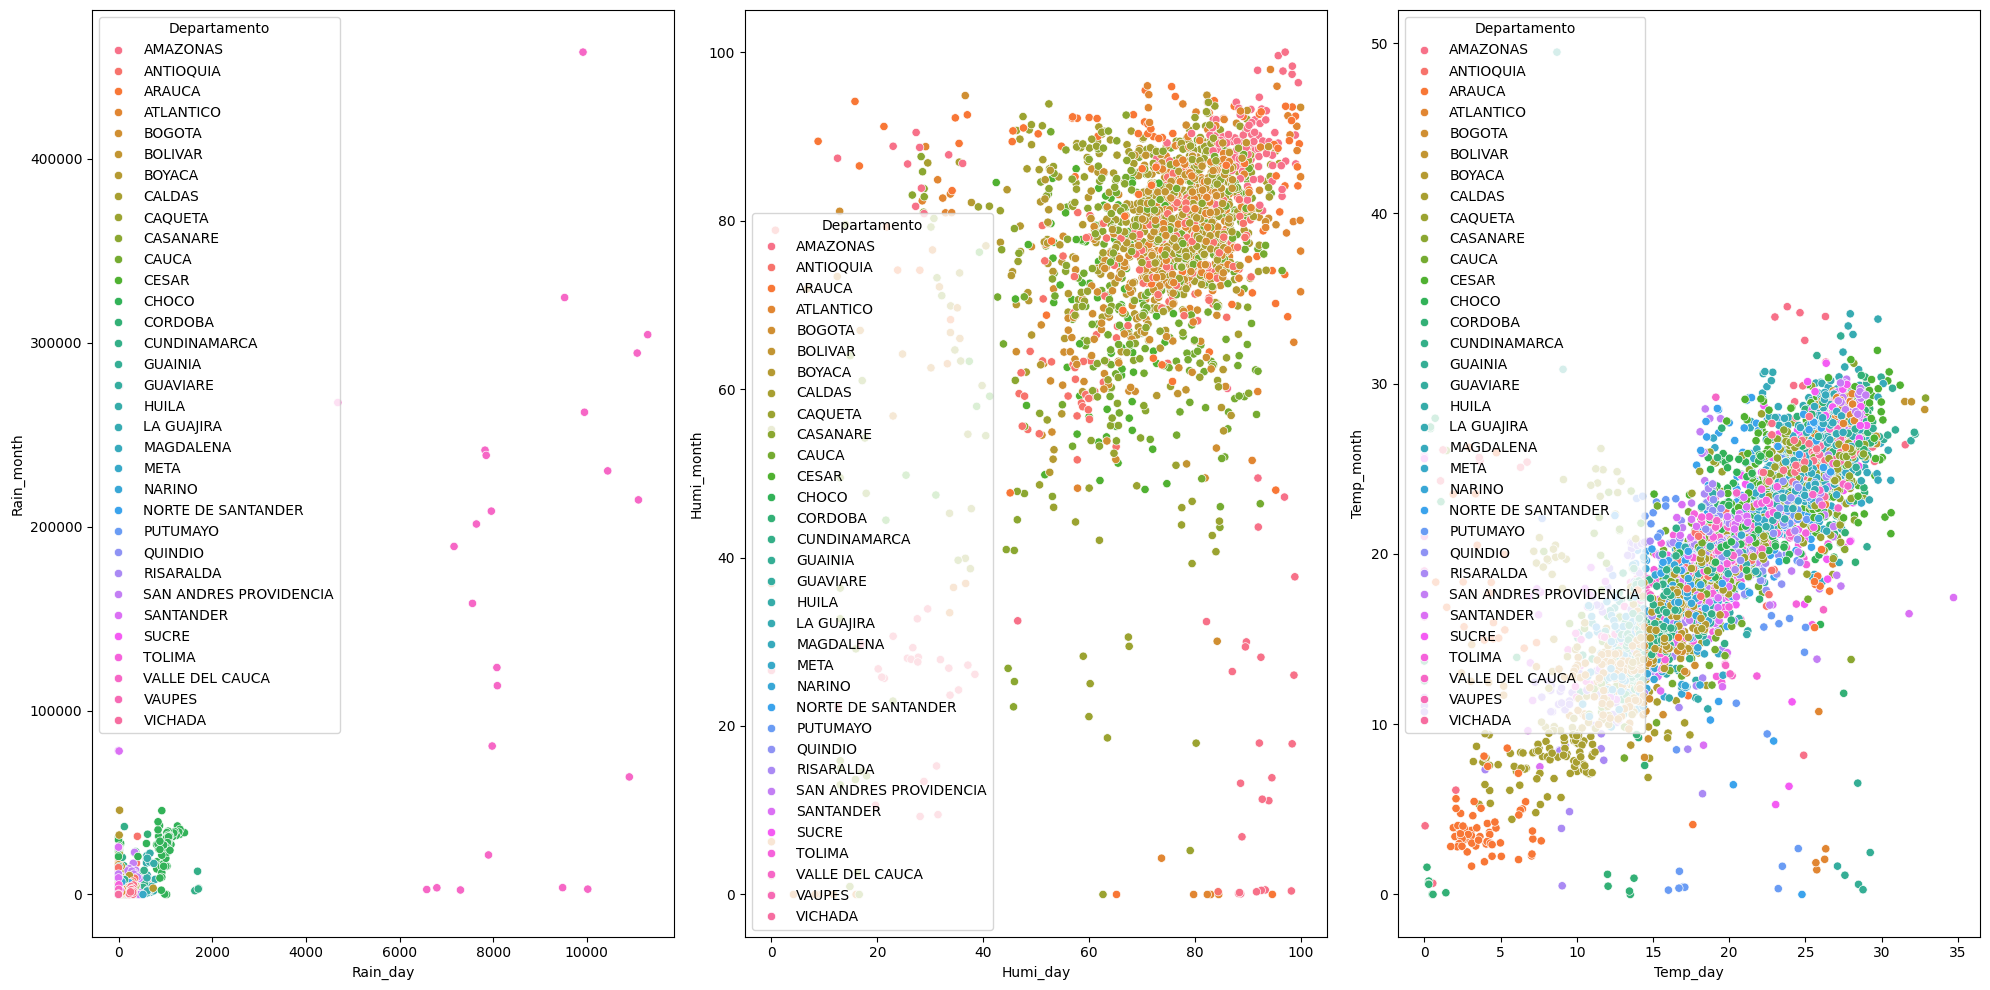

In [31]:
plt.figure(figsize=(20,10))
plt.subplot(131)
sns.scatterplot(data=data, x="Rain_day", y="Rain_month",hue="Departamento")
plt.subplot(132)
sns.scatterplot(data=data, x="Humi_day", y="Humi_month",hue="Departamento")
plt.subplot(133)
sns.scatterplot(data=data, x="Temp_day", y="Temp_month",hue="Departamento")
plt.tight_layout();plt.show()

In [33]:
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# ————————————————
# 0) Carga tu DataFrame (ya limpio, con columnas Year, Month/Day, Rain_day…, Departamento)
# ————————————————
# Por ejemplo, si vienes de Spark:
# df = T_spark.toPandas()

# O si ya estás en pandas:
# df = tu_dataframe_pandas.copy()

# ————————————————
# 1) Define las variables
# ————————————————
cat_feats = ['Departamento']
num_feats = ['Year', 'Month/Day',
             'Rain_day', 'Rain_month',
             'Temp_day', 'Temp_month',
             'Humi_day', 'Humi_month']

# ————————————————
# 2) Preprocesador: one‑hot para depto, passthrough para numéricas
# ————————————————
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_feats),
    ('num', 'passthrough', num_feats),
])

# ————————————————
# 3) Iterative Imputer con bosque aleatorio
# ————————————————
rf_estimator = RandomForestRegressor(
    n_estimators=100,
    n_jobs=-1,
    random_state=0
)

imputer = IterativeImputer(
    estimator=rf_estimator,
    max_iter=10,               # número de rondas de imputación
    initial_strategy='mean',   # cómo rellenar al comienzo
    imputation_order='ascending',
    random_state=0
)

pipeline = Pipeline([
    ('pre', preprocessor),
    ('imp', imputer),
])

# ————————————————
# 4) Ajusta y transforma
# ————————————————
X_imputed = pipeline.fit_transform(data)

# ————————————————
# 5) Reconstruye DataFrame con nombres de columnas
# ————————————————
# Obtén nombres de features tras el ColumnTransformer
feature_names = pipeline.named_steps['pre'].get_feature_names_out()

df_imputed = pd.DataFrame(X_imputed, columns=feature_names)

# Si quieres volver a unir columna 'Departamento' como categoría, podrías:
# departamento_cols = [c for c in feature_names if c.startswith('cat__Departamento')]
# df_imputed['Departamento'] = df_imputed[departamento_cols].idxmax(axis=1).str.replace('cat__Departamento_', '')

# ————————————————
# 6) Listo: df_imputed ya no tiene NaNs
# ————————————————
print(df_imputed.info())
print(df_imputed.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7524 entries, 0 to 7523
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   cat__Departamento_AMAZONAS                7524 non-null   float64
 1   cat__Departamento_ANTIOQUIA               7524 non-null   float64
 2   cat__Departamento_ARAUCA                  7524 non-null   float64
 3   cat__Departamento_ATLANTICO               7524 non-null   float64
 4   cat__Departamento_BOGOTA                  7524 non-null   float64
 5   cat__Departamento_BOLIVAR                 7524 non-null   float64
 6   cat__Departamento_BOYACA                  7524 non-null   float64
 7   cat__Departamento_CALDAS                  7524 non-null   float64
 8   cat__Departamento_CAQUETA                 7524 non-null   float64
 9   cat__Departamento_CASANARE                7524 non-null   float64
 10  cat__Departamento_CAUCA             

In [35]:
df_imputed

,cat__Departamento_AMAZONAS,cat__Departamento_ANTIOQUIA,cat__Departamento_ARAUCA,cat__Departamento_ATLANTICO,cat__Departamento_BOGOTA,cat__Departamento_BOLIVAR,cat__Departamento_BOYACA,cat__Departamento_CALDAS,cat__Departamento_CAQUETA,cat__Departamento_CASANARE,...,cat__Departamento_VAUPES,cat__Departamento_VICHADA,num__Year,num__Month/Day,num__Rain_day,num__Rain_month,num__Temp_day,num__Temp_month,num__Humi_day,num__Humi_month
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2006.0,1.0,0.0,0.000,25.017378,23.900927,88.102616,81.407159
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2006.0,1.0,0.0,199.500,19.324113,18.957285,72.291080,74.619183
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2006.0,1.0,0.0,0.000,4.905264,3.951957,78.035940,74.718325
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2006.0,1.0,0.0,0.000,25.899578,25.022157,77.344941,74.797651
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2006.0,1.0,0.1,56.600,13.195833,13.873947,72.581196,73.826251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2024.0,12.0,31.5,2549.600,28.600000,27.541524,78.865939,83.827022
7520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2024.0,12.0,7.7,5263.420,25.547887,21.558212,65.350509,78.336104
7521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2024.0,12.0,5.0,2829.232,25.485417,23.484995,71.907145,79.920617
7522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2024.0,12.0,0.0,305.400,27.176081,25.577988,82.720172,81.038751


In [38]:
df_imputed["Departamento"]=data["Departamento"]

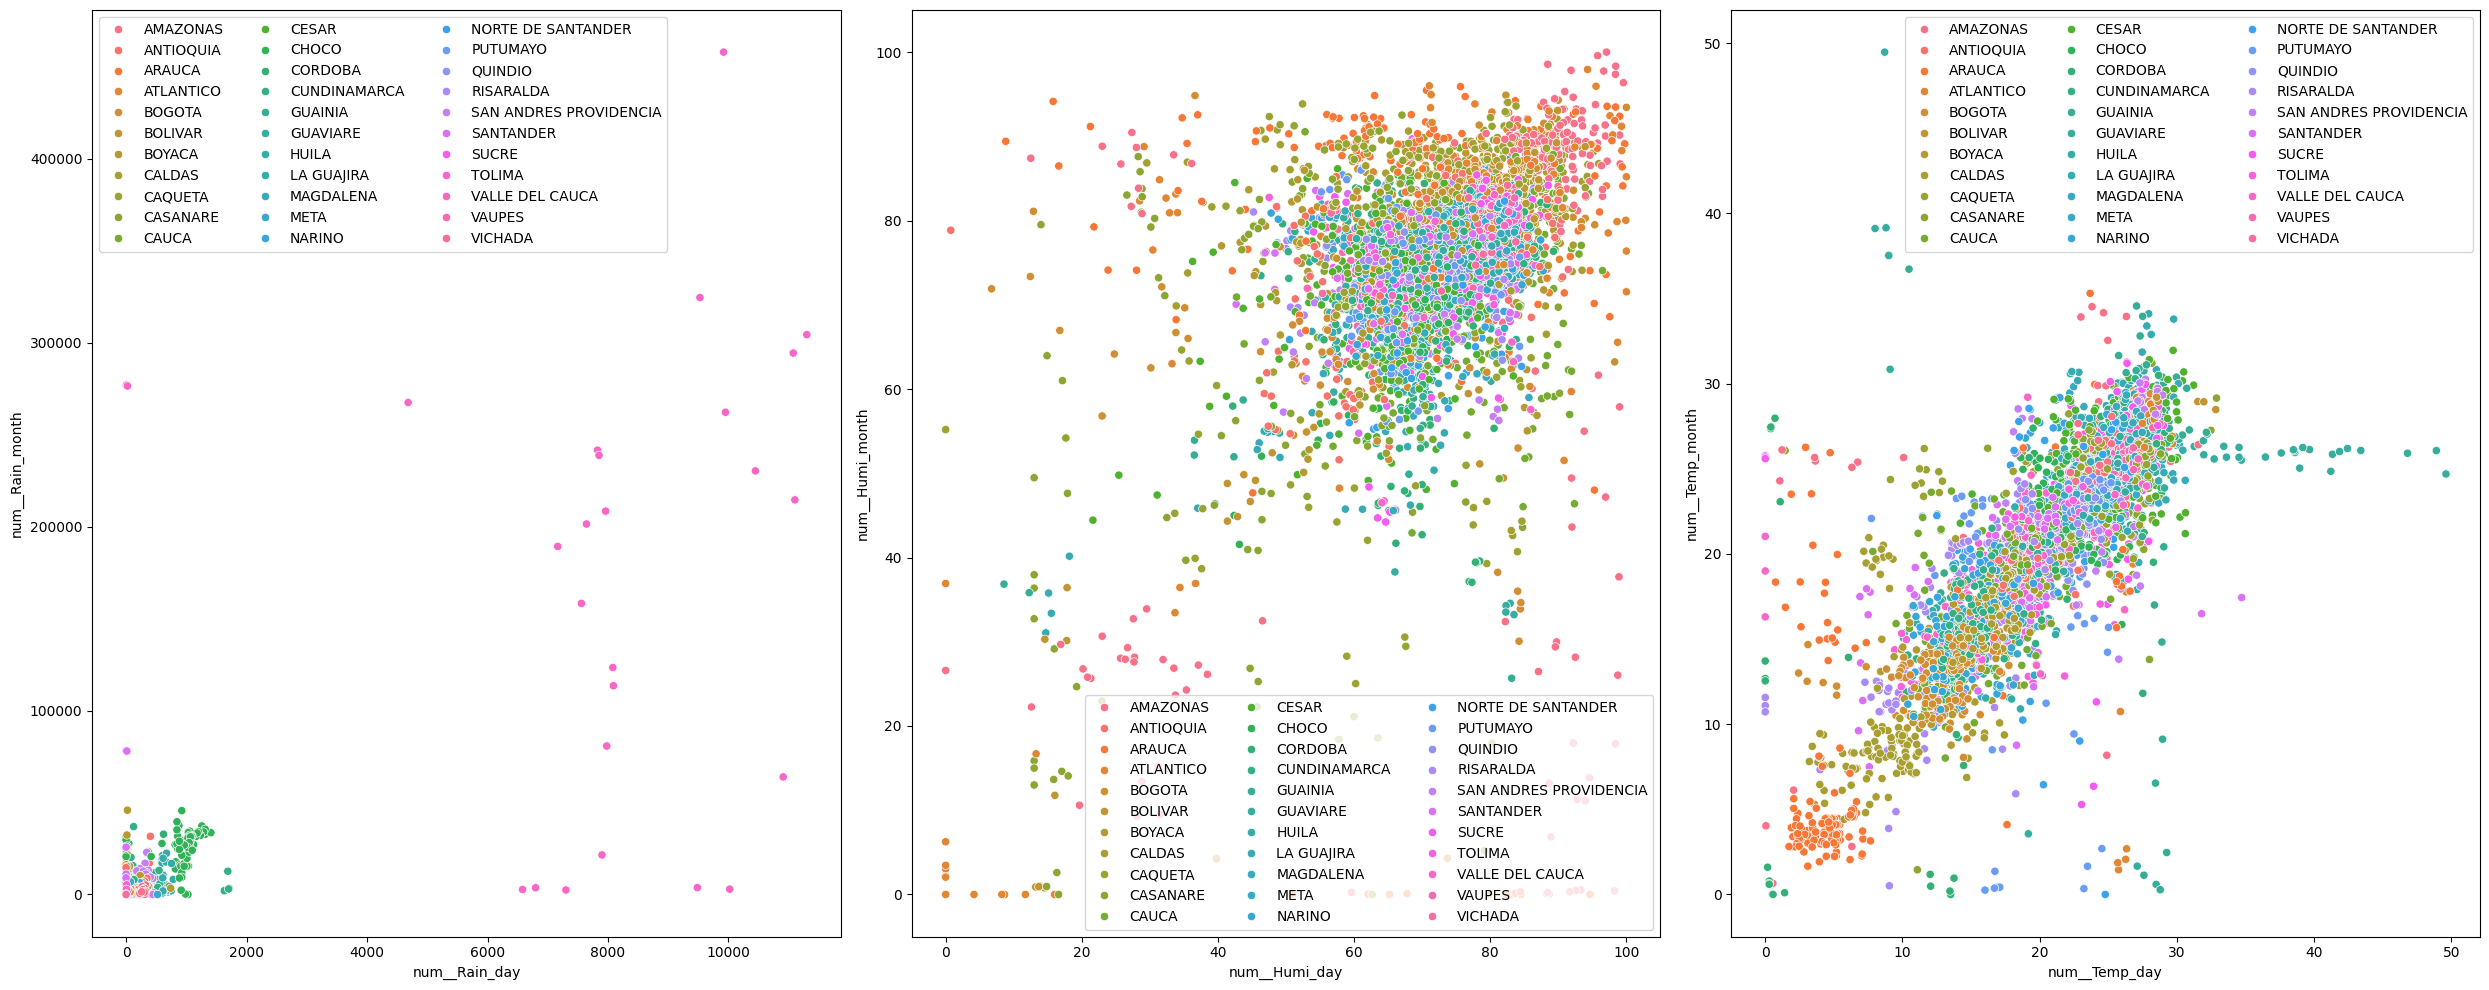

In [47]:
plt.figure(figsize=(25,10))
plt.subplot(131)
sns.scatterplot(data=df_imputed, x="num__Rain_day", y="num__Rain_month",hue="Departamento");plt.legend(ncol=3)
plt.subplot(132)
sns.scatterplot(data=df_imputed, x="num__Humi_day", y="num__Humi_month",hue="Departamento");plt.legend(ncol=3)
plt.subplot(133)
sns.scatterplot(data=df_imputed, x="num__Temp_day", y="num__Temp_month",hue="Departamento");plt.legend(ncol=3)
plt.tight_layout();plt.show()

In [49]:
data.to_csv("DataAllMining_Original.csv")
df_imputed.to_csv("DataAllMining_Imputed.csv")